<a href="https://colab.research.google.com/github/JasCapasci/Portfolio-Optimisation/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motive behind the Project**

The project focused on generating the Minimum Variance Portfolio on diversely selected Indian stocks. It gave me a deeper idea on the concepts I had learnt from the book like CAPM, Sharpe ratio etc. It's one of the projects with which I started exploring in the field of Quantitative Finance and this really gave me a deeper insight of the practical work that happens at the Industrial level.

# **Install the Packages**

In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Import the Libraries**

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

# **Choosing of the Stocks**

So basically what I did is I selected 5 stocks on total from 5 different sectors. The reason behind this is it increases the diversification and decreases the correlation between the individual stocks as they arent from the same sector.

# **Downloading of the Stocks**

In [24]:
stocks=['ASHOKLEY.NS','MARUTI.NS','BAJFINANCE.NS','BRITANNIA.NS','KOTAKBANK.NS']

In [25]:
df=yf.download(stocks,start='2017-01-01',end='2018-12-31',progress=False)['Adj Close']
df.sort_index(inplace=True)
df

Ticker,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,KOTAKBANK.NS,MARUTI.NS
Date,,,,,
2017-01-02,65.380356,850.404541,1283.016602,712.233826,5082.766602
2017-01-03,65.420715,864.039551,1276.704712,709.194763,5122.192871
2017-01-04,67.680779,852.212769,1267.881226,693.102722,5116.381836
2017-01-05,67.761490,879.433960,1273.837646,696.440735,5239.871094
2017-01-06,68.851166,858.614929,1286.794678,714.276489,5221.831055
...,...,...,...,...,...
2018-12-21,89.593643,2543.640869,2800.164795,1224.184326,7204.026367
2018-12-24,88.955811,2517.774902,2782.886719,1235.456665,7197.191406
2018-12-26,88.360504,2520.229004,2772.475830,1245.083008,7235.379883


In [8]:
returns=df.pct_change()
returns

Ticker,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,KOTAKBANK.NS,MARUTI.NS
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.000617,0.016034,-0.004920,-0.004267,0.007757
2017-01-04,0.034547,-0.013688,-0.006911,-0.022691,-0.001134
2017-01-05,0.001193,0.031942,0.004698,0.004816,0.024136
2017-01-06,0.016081,-0.023673,0.010172,0.025610,-0.003443
...,...,...,...,...,...
2018-12-21,-0.007536,-0.000058,-0.016100,-0.007361,-0.034680
2018-12-24,-0.007119,-0.010169,-0.006170,0.009208,-0.000949
2018-12-26,-0.006692,0.000975,-0.003741,0.007792,0.005306


In [9]:
mean_daily_returns=returns.mean()
mean_daily_returns

Ticker
ASHOKLEY.NS      0.000825
BAJFINANCE.NS    0.002478
BRITANNIA.NS     0.001657
KOTAKBANK.NS     0.001221
MARUTI.NS        0.000793
dtype: float64

In [10]:
cov_matrix=returns.cov()
cov_matrix

Ticker,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,KOTAKBANK.NS,MARUTI.NS
Ticker,,,,,
ASHOKLEY.NS,0.000466,0.000124,0.000056,0.000047,0.000085
BAJFINANCE.NS,0.000124,0.000435,0.000073,0.000092,0.000099
BRITANNIA.NS,0.000056,0.000073,0.000167,0.000055,0.000056
KOTAKBANK.NS,0.000047,0.000092,0.000055,0.000194,0.000051
MARUTI.NS,0.000085,0.000099,0.000056,0.000051,0.000185


In [11]:
num_portfolios = 30000
results = np.zeros((3+len(stocks),num_portfolios))

# **Optimization of the Weights**

In [12]:
for i in range(num_portfolios):

    weights = np.array(np.random.random(5))

    weights /= np.sum(weights)

    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame

,ret,stdev,sharpe,MARUTI.NS,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,KOTAKBANK.NS
0,0.334795,0.173946,1.924710,0.095718,0.186307,0.242694,0.020758,0.454522
1,0.354763,0.173362,2.046375,0.005357,0.160470,0.132279,0.537290,0.164604
2,0.336723,0.192404,1.750086,0.303884,0.238819,0.086009,0.132367,0.238921
3,0.333215,0.176349,1.889516,0.215288,0.202404,0.094531,0.232731,0.255045
4,0.415912,0.189825,2.191024,0.010808,0.372898,0.223199,0.083779,0.309317
...,...,...,...,...,...,...,...,...
29995,0.381499,0.181446,2.102545,0.272333,0.200045,0.349757,0.170151,0.007714
29996,0.417843,0.181113,2.307080,0.185808,0.238280,0.487464,0.085116,0.003333
29997,0.353690,0.168821,2.095061,0.008298,0.206220,0.137090,0.337271,0.311120
29998,0.348209,0.161295,2.158837,0.167566,0.055621,0.441918,0.252142,0.082752


In [14]:
max_sharpe_point = results_frame.iloc[results_frame['sharpe'].idxmax()]
max_sharpe_point

ret              0.446730
stdev            0.179301
sharpe           2.491512
MARUTI.NS        0.009012
ASHOKLEY.NS      0.286328
BAJFINANCE.NS    0.465842
BRITANNIA.NS     0.220724
KOTAKBANK.NS     0.018095
Name: 18036, dtype: float64

In [15]:
min_vol_point = results_frame.iloc[results_frame['stdev'].idxmin()]
min_vol_point

ret              0.317171
stdev            0.153875
sharpe           2.061221
MARUTI.NS        0.068705
ASHOKLEY.NS      0.024588
BAJFINANCE.NS    0.350151
BRITANNIA.NS     0.279308
KOTAKBANK.NS     0.277247
Name: 63, dtype: float64

C:\Users\dhruv\AppData\Local\Temp\ipykernel_6344\1316521357.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_point[1],max_sharpe_point[0],marker=(5,1,0),color='r',s=1000)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_6344\1316521357.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_point[1],min_vol_point[0],marker=(5,1,0),color='g',s=1000)


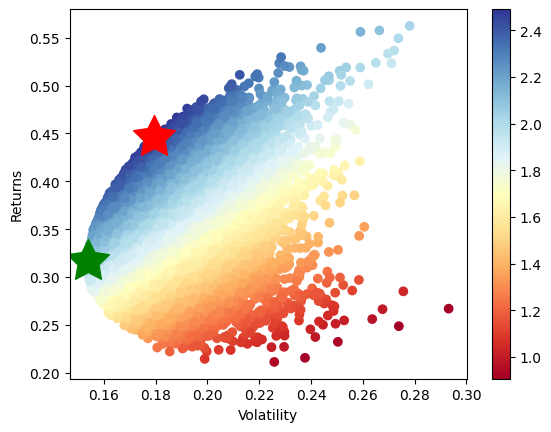

In [22]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_point[1],max_sharpe_point[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_point[1],min_vol_point[0],marker=(5,1,0),color='g',s=1000)

# **Testing the Weights for the Following Year**

In [17]:
test_df=yf.download(stocks,start='2019-01-01',end='2020-12-31',progress=False)['Adj Close']
test_df.sort_index(inplace=True)
test_df

Ticker,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,KOTAKBANK.NS,MARUTI.NS
Date,,,,,
2019-01-01,87.169891,2608.035645,2785.130615,1247.377319,7147.148926
2019-01-02,85.001266,2566.021973,2797.517090,1237.551514,6947.412109
2019-01-03,83.470490,2538.683838,2814.614990,1232.214722,6886.330078
2019-01-04,82.322395,2528.719727,2802.767090,1244.883545,6915.532715
2019-01-07,79.473442,2506.682861,2821.706055,1243.536743,7037.458008
...,...,...,...,...,...
2020-12-23,88.575172,5015.659180,3381.039062,1917.063110,7285.768555
2020-12-24,88.621696,5110.277832,3374.417236,1956.836670,7281.953613
2020-12-28,88.668213,5129.201660,3360.707764,1985.082275,7318.089844


In [18]:
test_returns=test_df.pct_change()
test_mean_daily_returns=test_returns.mean()
test_cov_matrix=test_returns.cov()
test_weights=[max_sharpe_point[3],max_sharpe_point[4],max_sharpe_point[5],max_sharpe_point[6],max_sharpe_point[7]]
test_weights=np.array(test_weights)
test_weights

C:\Users\dhruv\AppData\Local\Temp\ipykernel_6344\1926793650.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_weights=[max_sharpe_point[3],max_sharpe_point[4],max_sharpe_point[5],max_sharpe_point[6],max_sharpe_point[7]]


array([0.00901172, 0.28632785, 0.46584187, 0.22072366, 0.0180949 ])

In [19]:
test_portfolio_return = np.sum(mean_daily_returns * test_weights) * 252
test_portfolio_std_dev = np.sqrt(np.dot(test_weights.T,np.dot(test_cov_matrix, test_weights))) * np.sqrt(252)
print('test return is '+str(test_portfolio_return))
print('test std dev is '+str(test_portfolio_std_dev))

test return is 0.44672997288563027
test std dev is 0.30712584649317615


In [21]:
test_sharpe_ratio=test_portfolio_return/test_portfolio_std_dev
print('test sharpe ratio is '+str(test_sharpe_ratio))

test sharpe ratio is 1.454550237260985


So on testing the portfolio weights on the following year, we see a good sharpe ratio of **1.4732**.

# **Impact of Increasing the number of Stocks**

As the number of securities added to a portfolio increases, the standard deviation of the portfolio becomes smaller and smaller. Hence an investor can make the portfolio risk arbitrarily small by including a large number of securities with negative or zero correlation in the portfolio.

# **Why are calculating the weights by optimization and not giving equal weightage to every stock?**

So suppose if all the stocks are given equal weightage , then the overall portfolio will be dependent equally on each individual stock. So the risk of all the individual stocks have the same impact on the portfolio. whereas by calculating the weights by optimization results in assigning weights in such a way that the portfolio return increases and the standard deviation decreases.

# **Optimization techniques used by Mutual Funds currently**

An optimization technique used by the mutual funds is mean-variance optimization.

# **Parameters used for checking the accuracy**

I used return percentage and the standard devaiation(volatality) for checking the accuracy. I also used the sharpe ratio.